In [3]:
import os
import numpy as np
import pydub


In [ ]:
vocalremover(r'C:\Users\Jane\OneDrive - Jeli Media Ltd\clearcast\normalized\201901150009_Proxy.wav')

In [97]:
#track similarity detetor
def tracksimilaritydetector(filep):
    import wave
    import numpy as np
    splitchannels = []

    wr  = wave.open(filep)
    sz = 44100
    da = np.fromstring(wr.readframes(sz), dtype=np.int16)
    left, right = da[0::2], da[1::2]
    corrmatrix = np.corrcoef(left, right)
    corr = corrmatrix.item(1)
    if corr > 0.5:
        return True
    else:
        return False
    

#export splitchannels list at the end of engine

In [133]:
#stereo to mono converter

def stereo2mono(advertaudio):   
    sound = AudioSegment.from_wav(advertaudio)
    sound = sound.set_channels(1)
    sound.export(str(advertaudio[:-12])+'mono'+'.wav', format="wav")
    
    
    
    
    
stereo2mono(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901230233_Proxyisolated.wav')

In [6]:
#binarization

import wave
import numpy as np






#def binarization(filepath):
   #open file
signal = wave.open(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901230233_Proxy.wav','r')
    
   #get number of samples 
n_frames = signal.getnframes()
   #read file
sigdata = np.fromstring(signal.readframes(n_frames),dtype = np.int16)
   #make values positive
sigdata = list(map(lambda x: np.sqrt(x**2), sigdata))
    
   #get averages amplitudes for every 0.25 seconds 
qrtsecsigdata= []
samplesize=12000
    
i=0
    
while i < len(sigdata):
    avrg= np.mean(sigdata[i:i+samplesize])
    qrtsecsigdata.append(avrg)
    i= i+samplesize
       
sigdata=qrtsecsigdata
 
   #binarization
sigdata = map(lambda x: 0 if x <= 600 else x, sigdata)
sigdata = list(map(lambda x: 1 if x>600 else x, sigdata))
 
            
times = []
z=0
counter = 0
    
while z<len(sigdata):
    if int(sum(sigdata[z:z+2]))==1:
        times.append(float(z)/4)
        counter+=1 
        if counter%2==1:
            times.append('-')
        z=z+1
    else:
        z=z+1
                
                
#timesec = list(map(lambda x: x/4, times))
print('times',times)    



    
#binarization(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901230233_Proxy.wav')        
    
    
    

C:\Users\Jane\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


times [1.0, '-', 13.0, 13.25, '-', 30.75, 31.25, '-', 32.25, 33.25, '-', 46.75, 47.0, '-', 47.75, 48.25, '-', 49.5, 50.0, '-', 52.25, 52.5, '-', 54.75, 55.0, '-', 55.75, 56.0, '-', 57.5]


In [96]:
from scipy.io import wavfile
fs, data = wavfile.read(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901150009_Proxy.wav')
print(fs)
print(len(data))
print(data)

nx = len(data)
ny = nx/3*4 

48000
1440768
[[ 0  0]
 [ 2 -2]
 [-1  1]
 ...
 [ 3  0]
 [-1  0]
 [ 0  0]]


In [3]:
from pydub import AudioSegment
from pydub.playback import play
import numpy as np
import wave

def vocalremover(advertaudio, path, filename):
# read in audio file and get the two mono tracks
    sound_stereo = AudioSegment.from_wav(advertaudio)
    sound_monoR = sound_stereo.split_to_mono()[1]
    sound_monoL = sound_stereo.split_to_mono()[0]
    

# Invert phase of the Right audio file
    sound_monoR_inv = sound_monoR.invert_phase()

# Merge two L and R_inv files, this cancels out the centers
    sound_CentersOut = sound_monoL.overlay(sound_monoR_inv)
    
    print(sound_CentersOut.duration_seconds)
    print(sound_stereo.duration_seconds)
    print(sound_monoR.duration_seconds)  
    
# Export merged audio file
    sound_CentersOut.export(path+'\\isolated\\' +filename +'isolated'+'.wav', format="wav")

    
    
    
    
vocalremover(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901230233_Proxy.wav',r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized','201901230233_Proxy')







30.016
30.016
30.016


In [6]:
import wave
import numpy as np
import os

directory = (r"C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized")
os.makedirs(directory+'\isolated')
os.makedirs(directory+'\mono')
for file in os.listdir(directory):
    filename = (file)
    filepath = os.path.join(directory,file)
    print(filepath)
    print (directory)
    print (filename)
    vocalremover(filepath,directory, filename)
    
    
    
    
    


C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901150009_Proxy.wav
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized
201901150009_Proxy.wav
30.016
30.016
30.016
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901180220_Proxy.wav
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized
201901180220_Proxy.wav
20.011
20.010666666666665
20.010666666666665
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901230233_Proxy.wav
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized
201901230233_Proxy.wav
30.016
30.016
30.016
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901240311_Proxy.wav
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized
201901240311_Proxy.wav
30.067
30.0669375
30.0669375
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201901250148_Proxy.wav
C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized
201901250148_Proxy.wav
30.016
30.016
30.016
C:\Users\Jane\Downloads\clearcast

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Jane\\Downloads\\clearcastaudio\\wav files\\normalized\\isolated'

In [11]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np

# Load the data and calculate the time of each sample
samplerate, data = wavfile.read(r'C:\Users\Jane\Downloads\clearcastaudio\wav files\normalized\201902050241_Proxy.wav')
print(samplerate)

48000


In [22]:
# Load the required libraries:
#   * scipy
#   * numpy
#   * matplotlib
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
# Load the data and calculate the time of each sample
def waveplotter(filepath, filename):
    plt.rcParams['agg.path.chunksize'] = 48000
    plt.rcParams.update({'font.size': 32})
    samplerate, data = wavfile.read(filepath)
    
    qrtsecsigdata= []
    samplesize=24000
    
    i=0
    
    while i < len(data):
        avrg= np.mean(data[i:i+samplesize])
        avrg= abs(avrg)
        qrtsecsigdata.append(avrg)
        i= i+samplesize
       
    data=np.array(qrtsecsigdata)
    
    
    
    pd.DataFrame(data).to_csv(str(filepath[:-4])+'.csv') 
    times = np.arange(len(data))/2

# Make the plot
# You can tweak the figsize (width, height) in inches
    plt.figure(figsize=(30, 20))
    plt.fill_between(times, data, color='blue') 
    plt.xlim(times[0], times[-1])
    plt.ylim(0, 200)
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
# You can set the format by changing the extension
# like .pdf, .svg, .eps
   # plt.savefig(str(filepath[:-4])+'graph'+'.png', dpi=300)
   # plt.show()

C:\Users\Jane\Downloads\clearcastaudio\iso\201902050241_Proxy.wavisolated.wav
201902050241_Proxy.wavisolated.wav
C:\Users\Jane\Downloads\clearcastaudio\iso\ALS_LADS209_030_Proxy.wavisolated.wav
ALS_LADS209_030_Proxy.wavisolated.wav
C:\Users\Jane\Downloads\clearcastaudio\iso\AMV-BZCW077-030_Proxy.wavisolated.wav
AMV-BZCW077-030_Proxy.wavisolated.wav
C:\Users\Jane\Downloads\clearcastaudio\iso\CKC_SKHD069_030_Proxy.wavisolated.wav
CKC_SKHD069_030_Proxy.wavisolated.wav
C:\Users\Jane\Downloads\clearcastaudio\iso\HKX-PGSV001-030_Proxy.wavisolated.wav
HKX-PGSV001-030_Proxy.wavisolated.wav


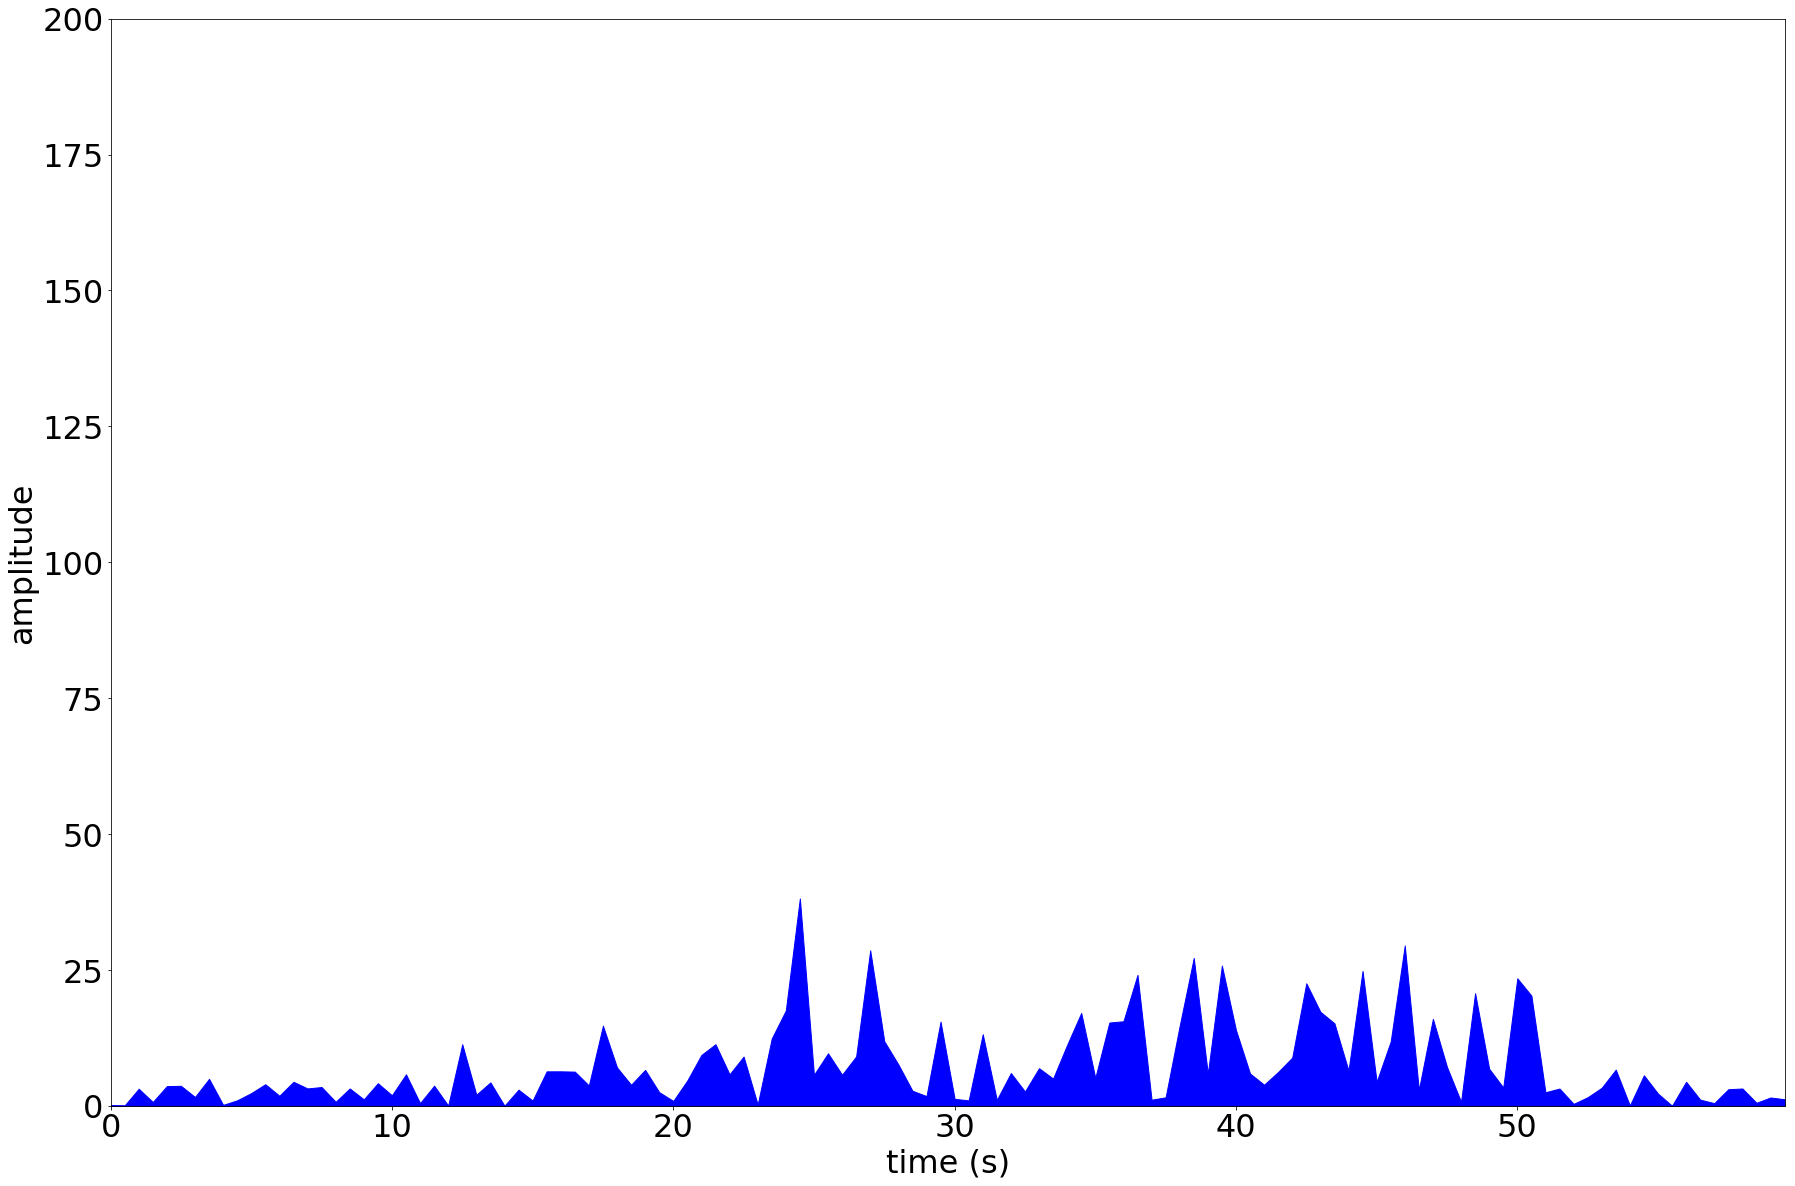

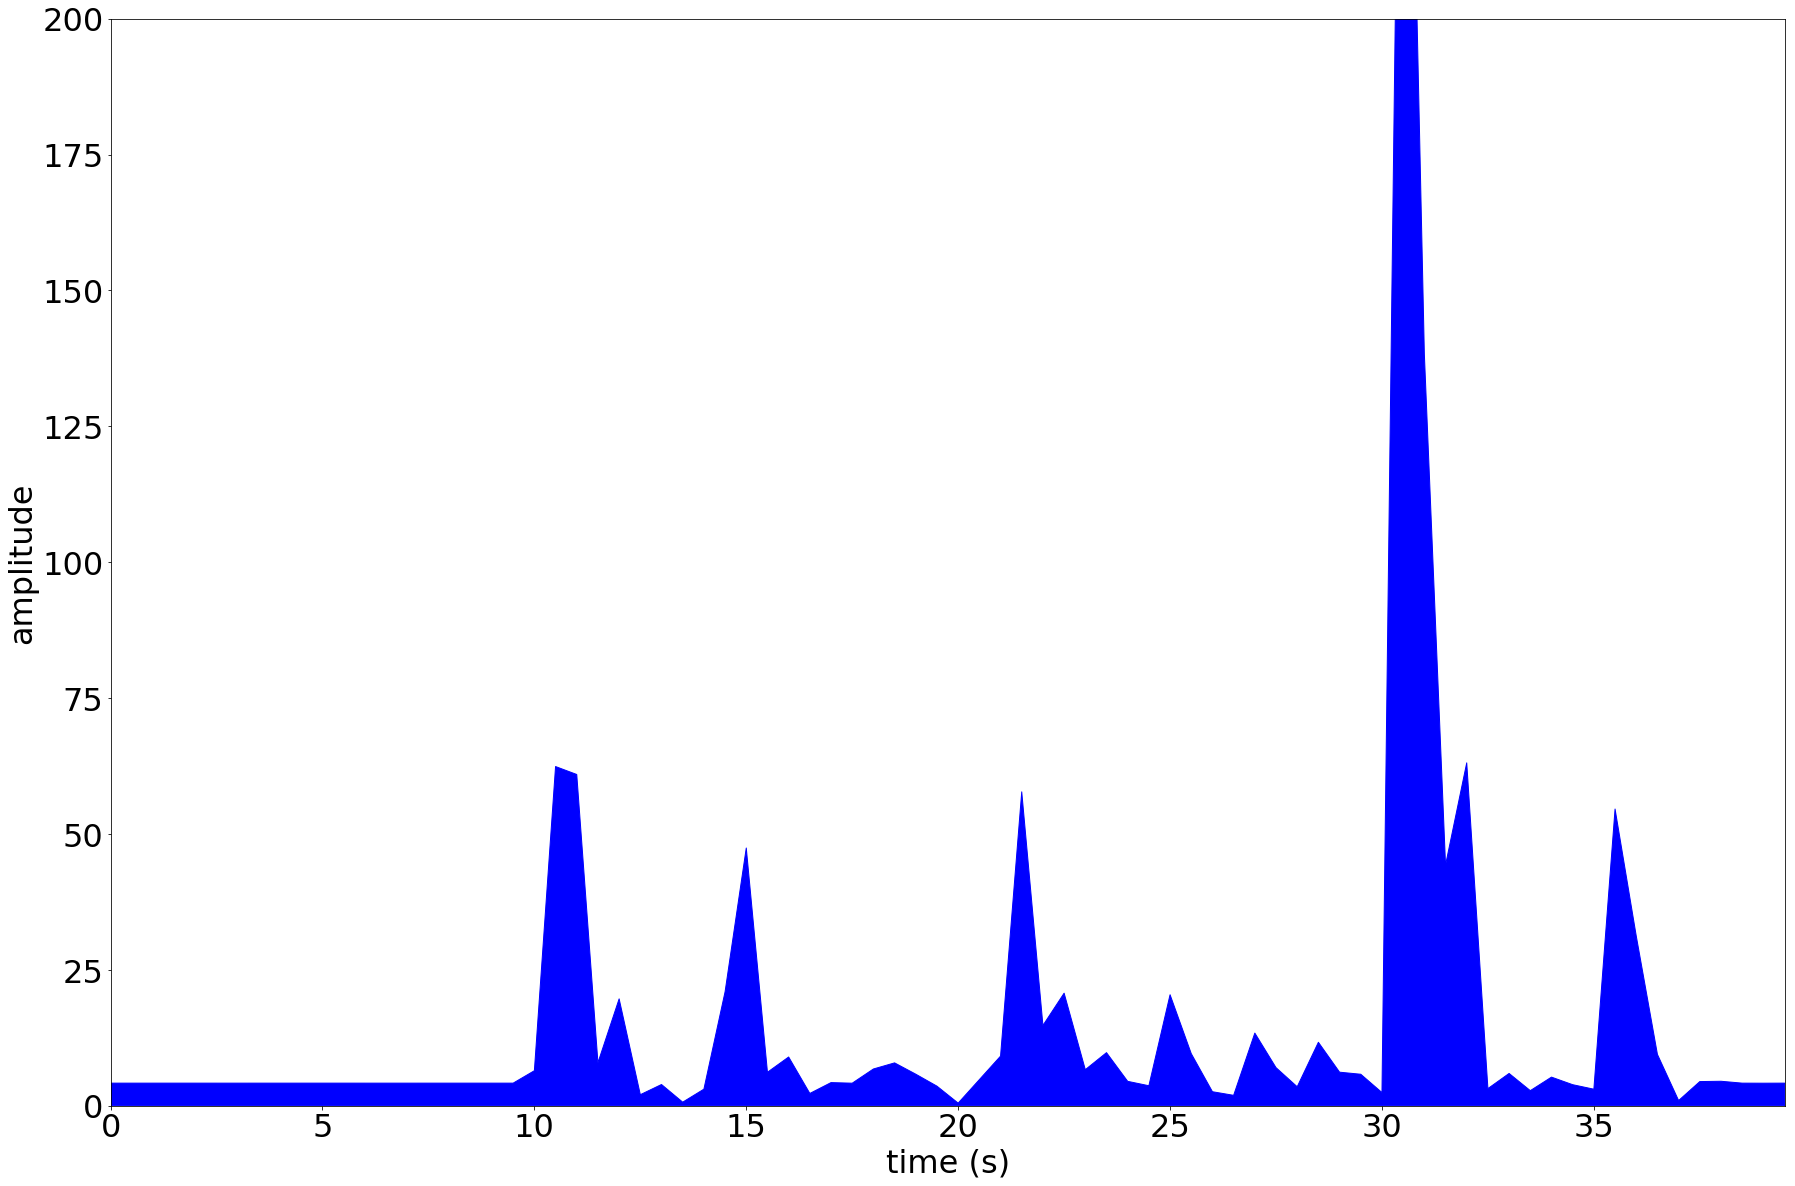

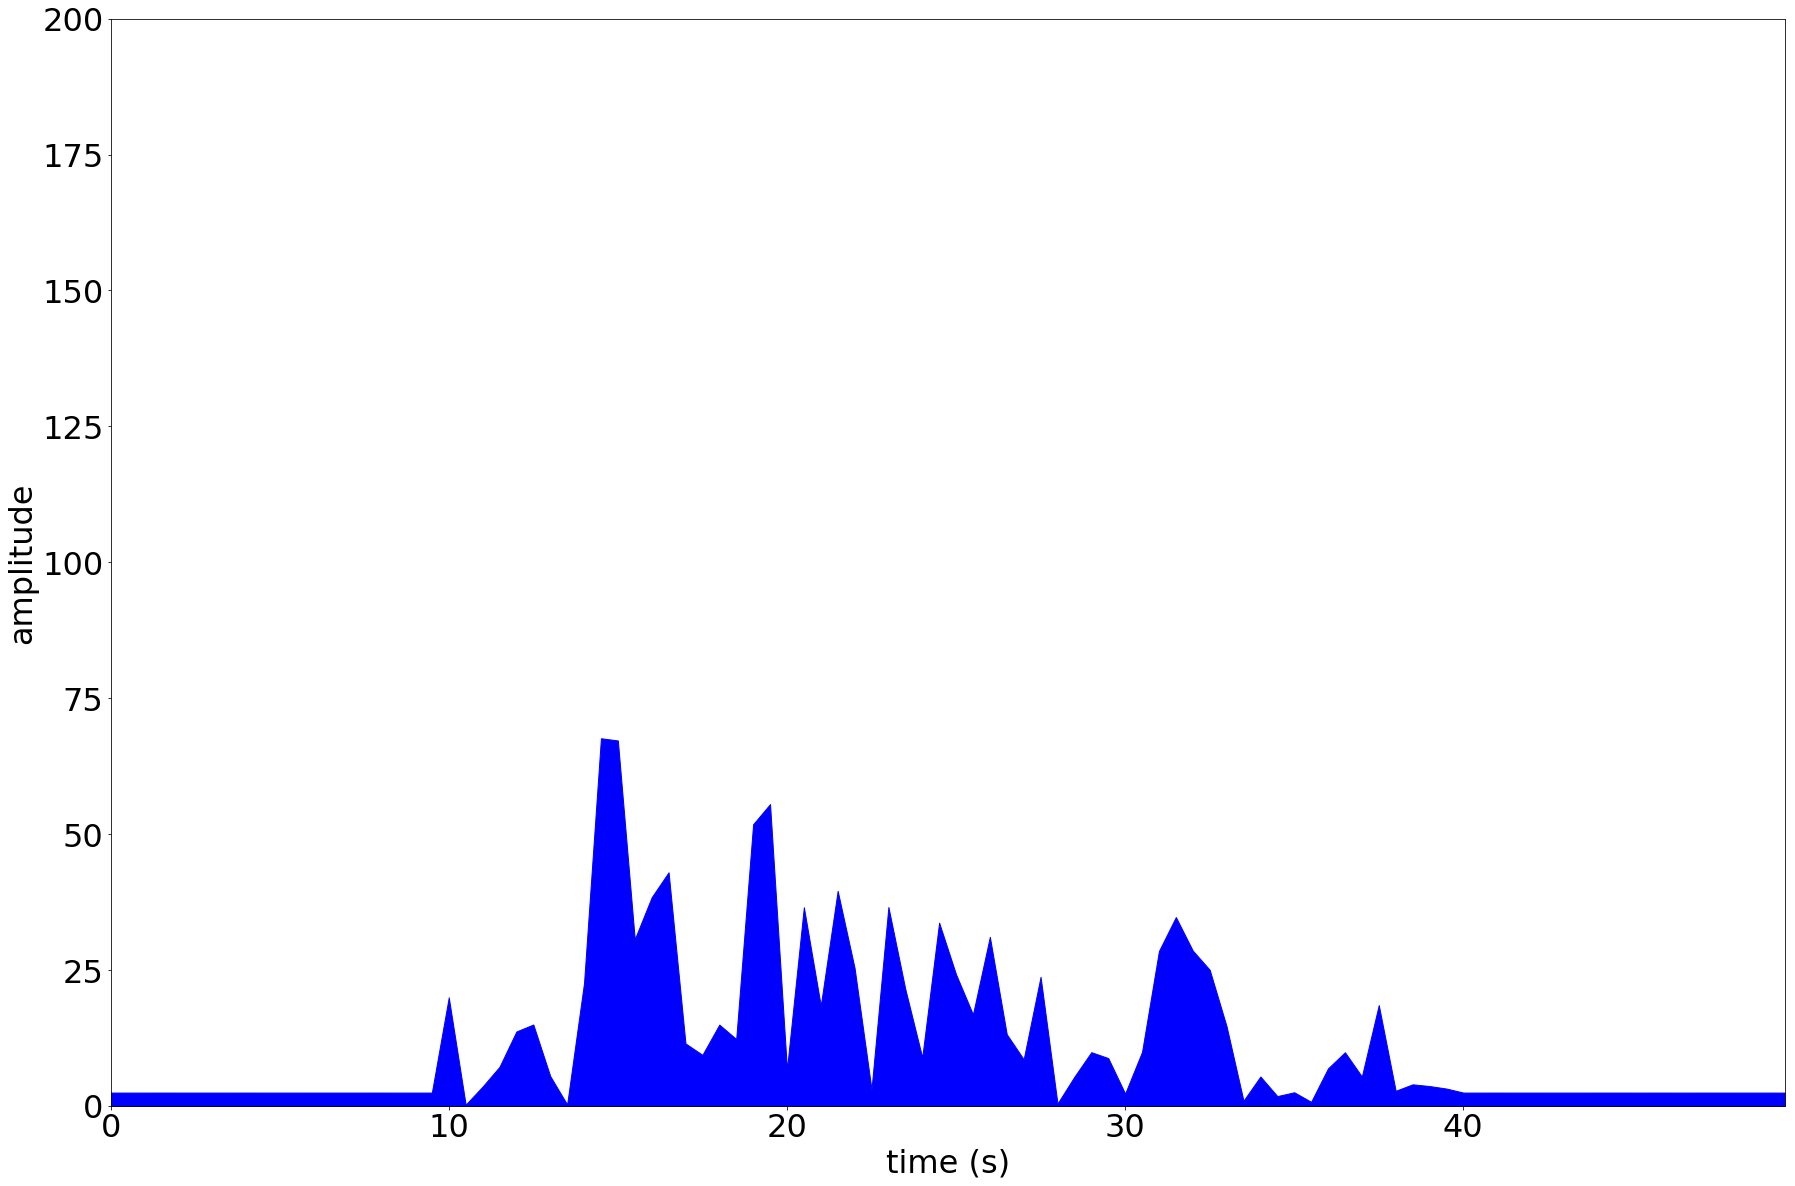

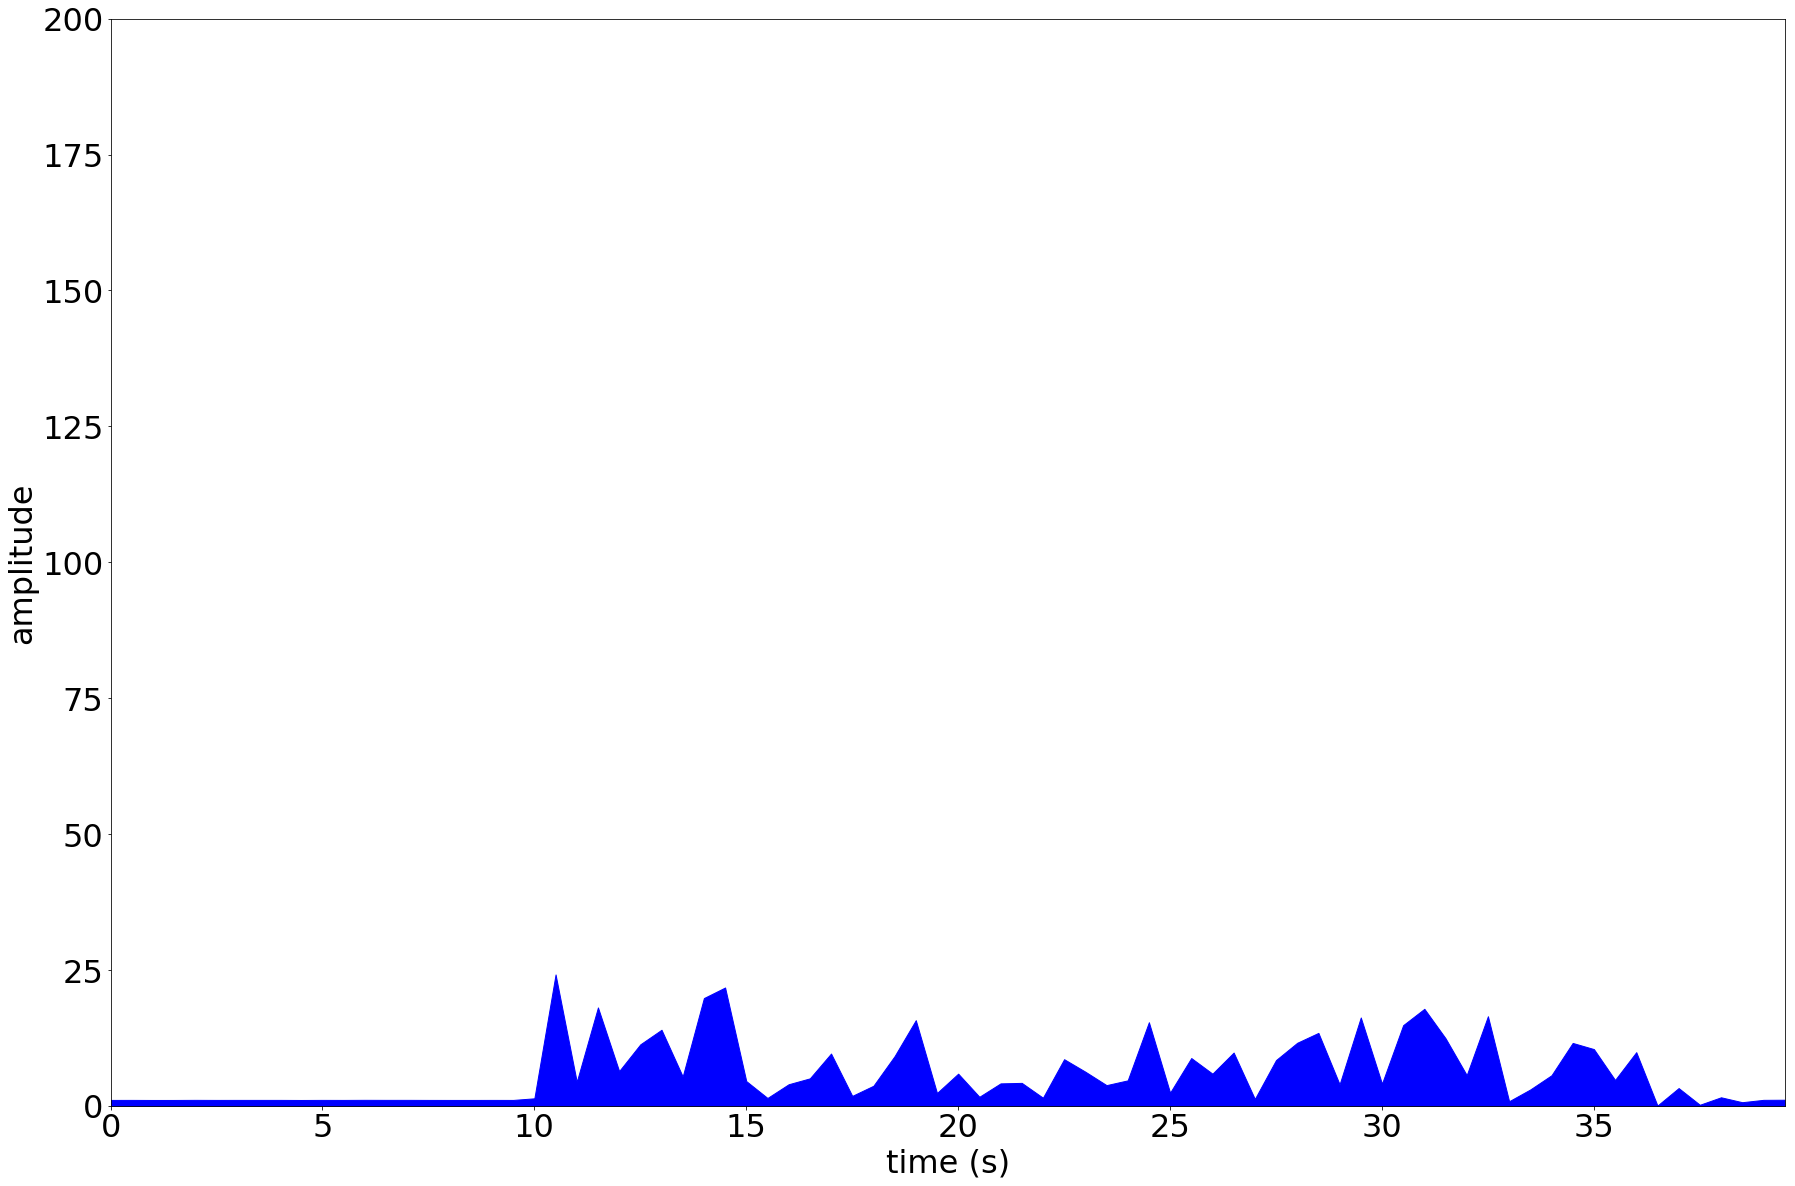

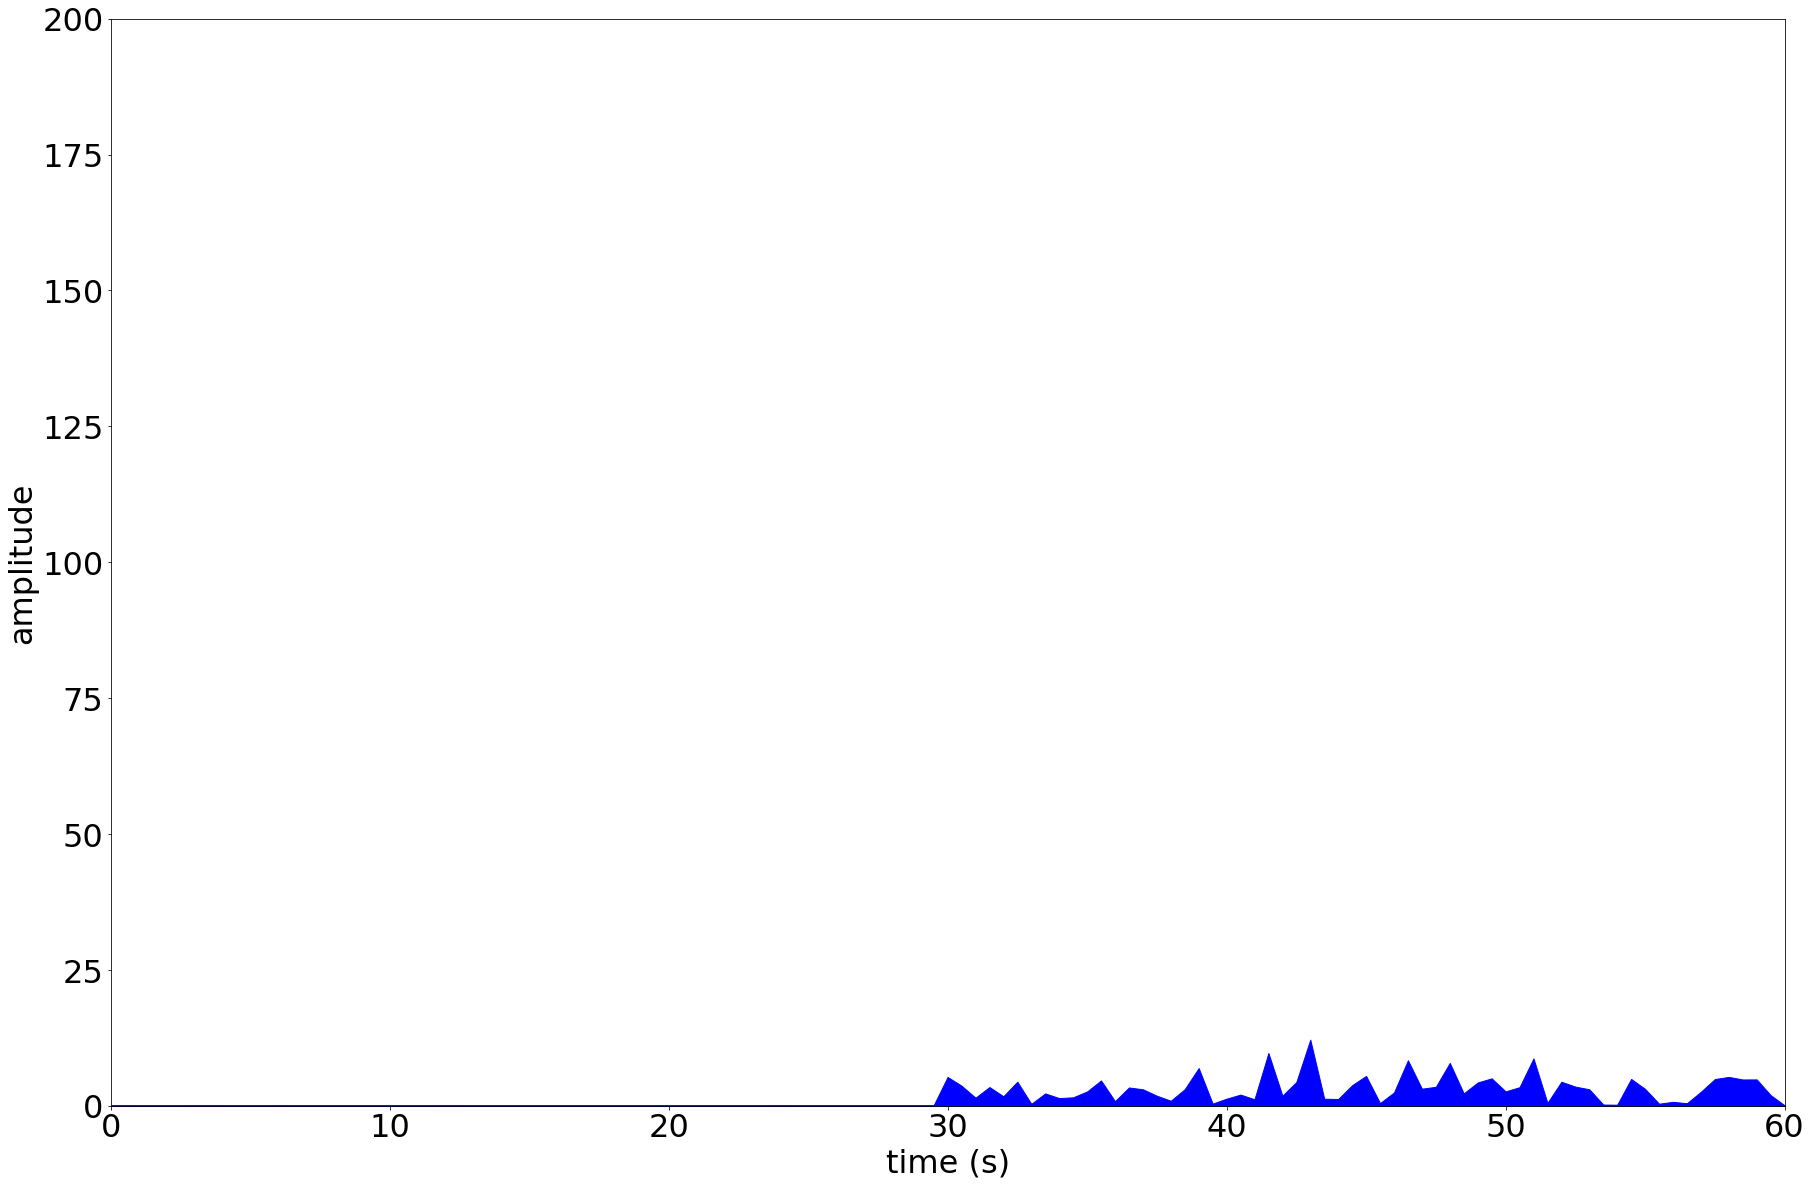

In [24]:
import wave
import numpy as np
import os

directory = (r"C:\Users\Jane\Downloads\clearcastaudio\iso")
#os.makedirs(directory+'\isolated')
#os.makedirs(directory+'\mono')
for file in os.listdir(directory):
    filename = (file)
    filepath = os.path.join(directory,file)
    print(filepath)
    print (filename)
    waveplotter(filepath, filename)

In [ ]:
def csvplot(filename,filepath):
    signal = wave.open(filepath,'r')

